In [4]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from matplotlib import gridspec

from scipy import stats
from scipy.signal import argrelextrema

In [ ]:
workdir = 'D:\processing\win\MANACAPURUv6ndLOWRW'
img = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002_subset.txt'
fullpath = os.path.join(workdir,img)
df = pd.read_csv(fullpath)

In [6]:
workdir = Path('D:/processing/linux/14100000_manacapuru_v15')
img = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002.csv'
fullpath = Path(workdir/img)
df = pd.read_csv(fullpath)

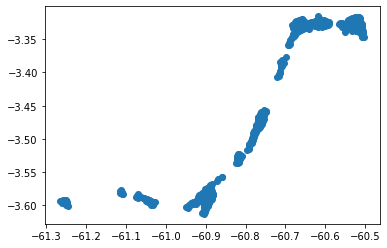

In [9]:
plt.scatter(df['longitude:double'], df['latitude:double'])

In [10]:
x = df['Oa08_reflectance:float'].copy()
type(x)

pandas.core.series.Series

In [11]:
kernel = stats.gaussian_kde(dataset=x,bw_method='silverman')

In [12]:
kde_res = kernel(x)

In [13]:
xs, ys = zip(*sorted(zip(x, kde_res)))

In [14]:
xray = np.array(xs)
yray = np.array(ys)

ma = argrelextrema(yray, np.greater)[0]

print(xray[ma])

[0.10645466 0.13989075]


In [15]:
list(argrelextrema(yray, np.greater)[0])

[50, 339]

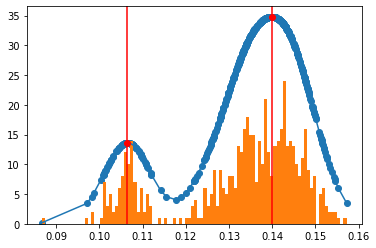

In [16]:
plt.plot(xray,yray)
plt.plot(xray[ma],yray[ma],'or')
plt.scatter(x,kde_res)
plt.hist(x,100)

for m in xray[ma]:
    plt.axvline(m, color='red')

In [17]:
def kde_local_maxima(x):
    
    if x > 1:
    
        kernel = stats.gaussian_kde(dataset=x,bw_method='silverman')

        kde_res = kernel(x)

        xs, ys = zip(*sorted(zip(x, kde_res)))

        xray = np.array(xs)
        yray = np.array(ys)

        ma = argrelextrema(yray, np.greater)[0]
        peak_position = list(ma)
        return peak_position,xray,yray,kde_res

In [18]:
def plot_kde_hist(title,xray,yray,x,kde_res,pk,svpath_n_title=None):
    plt.rcParams['figure.figsize'] = [16, 6]
    fig = plt.figure()
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    ax = fig.add_subplot(gs[0])
    #ax = plt.axes()
    ax.set_title(title, fontsize=16)


    ax.plot(xray,yray,color='k',label='Fitted KDE',zorder=11)
    ax.plot(xray[pk],yray[pk],'or',zorder=11,label='KDE Local Maxima')
    ax.hist(x,100,color='lightblue',label='Histogram')
    ax.scatter(x,kde_res,zorder=10,marker='x',label='Observations')

    ax.set_xlabel('Reflectance - Oa08:665nm', fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    
    # Get the mean
    ax.axvline(x.mean(), color='g', label='Mean')
    # Get the std. dev.
    ax.axvline(x=np.mean(x)-np.std(x), ls = "--", color='g', alpha=0.7,label='Std.Deviation')
    ax.axvline(x=np.mean(x)+np.std(x), ls = "--", color='g', alpha=0.7)
    
    ax.legend()
    
    for m in xray[pk]:
        ax.axvline(m, color='r')
    
    ax2 = fig.add_subplot(gs[1])
    
    cv = (np.std(x)/np.mean(x))*100
    cv = round(cv,6)
    
    table_data=[
        ["Mean", round(np.mean(x),6)],
        ["Std. Deviation", round(np.std(x),6)],
        ["KDE Local max.", str(xray[pk])],
        ["Coeff. of variation", str(round(cv,2))+'%']
    ]

    table = ax2.table(cellText=table_data, loc='center')
    table.set_fontsize(10)
    table.scale(1,2)
    ax2.axis('off')
    
    if svpath_n_title:
        plt.savefig(svpath_n_title, dpi=300)
        plt.close(fig)
    
    if not svpath_n_title:
        plt.show()

In [5]:
import time

sys.path.append('../')
from tsgen import TsGenerator
tsgen = TsGenerator()

# in_dir = 'D:\\S3\\L2_WFR_subset\\MANACAPURU'
in_dir = 'D:\\processing\\win\\MANACAPURUv8'
img_dir = 'D:\\processing\\win\\a1_plots\\MANACAPURU_hist'

todo = tsgen.build_list_from_subset(in_dir)
todo_fullpath = [os.path.join(in_dir,csv) for csv in todo]
print(f'{todo[0]}\n\n{todo_fullpath[0]}')

S3A_OL_2_WFR____20160502T140055_20160502T140255_20171031T025227_0119_003_338______MR1_R_NT_002_subset.txt

D:\processing\win\MANACAPURUv8\S3A_OL_2_WFR____20160502T140055_20160502T140255_20171031T025227_0119_003_338______MR1_R_NT_002_subset.txt


In [7]:
df = pd.read_csv(todo_fullpath[0])
df.head()

,Unnamed: 0,featureId,Oa01_reflectance:float,Oa01_reflectance_err:float,Oa02_reflectance:float,Oa02_reflectance_err:float,Oa03_reflectance:float,Oa03_reflectance_err:float,Oa04_reflectance:float,Oa04_reflectance_err:float,...,atmospheric_temperature_profile_pressure_level_21:float,atmospheric_temperature_profile_pressure_level_22:float,atmospheric_temperature_profile_pressure_level_23:float,atmospheric_temperature_profile_pressure_level_24:float,atmospheric_temperature_profile_pressure_level_25:float,total_columnar_water_vapour:float,PCTVLDPX,FLAGS,QUALITY,GLINT
0,0,59529,0.015448,0.000397,0.014240,0.000342,0.017170,0.000269,0.022901,0.000195,...,239.08107,246.70908,256.60333,263.43457,262.93570,61.029194,3912,"['LAND', 'INLAND_WATER', 'OCNN_FAIL', 'BPAC_ON...",1,37.518507
1,1,59534,0.039637,0.000470,0.039308,0.000415,0.043043,0.000323,0.048134,0.000232,...,239.05920,246.74329,256.59976,263.41656,262.94507,60.930477,3912,"['LAND', 'INLAND_WATER', 'BPAC_ON', 'HIGHRW']",1,37.431450
2,2,59880,0.012995,0.000525,0.012116,0.000470,0.016950,0.000360,0.026856,0.000250,...,239.08694,246.69496,256.60507,263.43747,262.93497,61.053078,3912,"['LAND', 'INLAND_WATER', 'WV_FAIL', 'OCNN_FAIL...",1,37.537609
3,3,59881,0.024256,0.000433,0.023853,0.000378,0.025922,0.000287,0.031379,0.000195,...,239.08260,246.70174,256.60428,263.43390,262.93683,61.033660,3912,"['LAND', 'INLAND_WATER', 'OCNN_FAIL', 'BPAC_ON...",1,37.520179
4,4,59882,0.001788,0.000909,0.001697,0.000873,0.005451,0.000745,0.012683,0.000580,...,239.07825,246.70851,256.60352,263.43036,262.93870,61.014244,3912,"['LAND', 'INLAND_WATER', 'OC4ME_FAIL', 'OCNN_F...",1,37.502761


In [248]:
# workdir = 'D:\processing\win\MANACAPURUv6ndLOWRW'

x = df['Oa08_reflectance:float'].copy()

pk,xray,yray,kde_res = tsgen.kde_local_maxima(x)

title = os.path.basename(todo_fullpath[0]).split('____')[1].split('_')[0]

plot_kde_hist(title, xray, yray, x, kde_res, pk, 'D:\\processing\\teste.png')

# 'D:\\processing\\teste.png'


In [ ]:
t1 = time.perf_counter()

total = len(todo_fullpath)
for n,img in enumerate(todo_fullpath):
    print(f'>>> Processing: {n+1} of {total} ... {img}')
    
    df = pd.read_csv(img, sep='\t', skiprows=1)
    
    if len(df) < 3:
        print(f'Skipping CSV for lack of samples:({len(df)}) {img}')
        continue
    
    figdate = os.path.basename(img).split('____')[1].split('_')[0]
    figtitl = 'MANACAPURU '+figdate
    savpt = os.path.join(img_dir,figdate+'.png')
    
    x = df['Oa08_reflectance:float'].copy()
    
    pk,xray,yray,kde_res = kde_local_maxima(x)

    print(f'Generating image: {savpt}')
    svpath_n_title = savpt
    
    plot_kde_hist(figtitl,xray,yray,x,kde_res,pk,svpath_n_title)
    
t2 = time.perf_counter()
print(f'>>> Finished in {round(t2 - t1, 2)} second(s). <<<')